In [1]:
#!pip install opencv-python matplotlib imageio gdown tensorflow

In [2]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

In [3]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [6]:
physical_devices = tf.config.list_physical_devices('CPU')
try:
     tf.config.experimental.set_memory_growth(physical_devices[0], True)
except:
    pass

In [7]:
import gdown

In [8]:
# url = 'https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL'
# output = 'data.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('data.zip')

In [9]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [10]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()} "
    f"(size ={char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '] (size =40)


In [ ]:
char_to_num(['n','i','c','k'])

In [ ]:
num_to_char([14,  9,  3, 11])

In [11]:
def load_video(path:str) -> List[float]: 

    cap = cv2.VideoCapture(path)
    frames = []
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))): 
        ret, frame = cap.read()
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()
    
    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))
    return tf.cast((frames - mean), tf.float32) / std

In [12]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]


In [13]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    #file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [14]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

NameError: name 'test_path' is not defined

In [15]:
path='data\\alignments\\s1\\bbaf2n.align'

In [16]:
with open(path, 'r') as f: 
    lines = f.readlines()
    tokens = []
    for line in lines:
        line =line.split()
        print(line)
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    print(tokens)
    print(tf.strings.unicode_split(tokens, input_encoding='UTF-8'))
    print(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))
    print(char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:])

['0', '23750', 'sil']
['23750', '29500', 'bin']
['29500', '34000', 'blue']
['34000', '35500', 'at']
['35500', '41000', 'f']
['41000', '47250', 'two']
['47250', '53000', 'now']
['53000', '74500', 'sil']
[' ', 'bin', ' ', 'blue', ' ', 'at', ' ', 'f', ' ', 'two', ' ', 'now']
<tf.RaggedTensor [[b' '], [b'b', b'i', b'n'], [b' '], [b'b', b'l', b'u', b'e'], [b' '],
 [b'a', b't'], [b' '], [b'f'], [b' '], [b't', b'w', b'o'], [b' '],
 [b'n', b'o', b'w']]>
tf.Tensor(
[b' ' b'b' b'i' b'n' b' ' b'b' b'l' b'u' b'e' b' ' b'a' b't' b' ' b'f'
 b' ' b't' b'w' b'o' b' ' b'n' b'o' b'w'], shape=(22,), dtype=string)
tf.Tensor([ 2  9 14 39  2 12 21  5 39  1 20 39  6 39 20 23 15 39 14 15 23], shape=(21,), dtype=int64)


In [ ]:
path='data\\s1\\'
file_name = path.split('\\')[-1]
path

In [17]:
os.path.exists(path)

True

In [ ]:
a=['hello']
b=[]
b=[*a]      
print(b)        

In [ ]:
tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1))

In [18]:
import tensorflow as tf

# Split a string into a sequence of Unicode code points
string = "Hello, world!"
unicode_code_points = tf.strings.unicode_split(string, input_encoding='UTF-8')

# Print the Unicode code points
print(unicode_code_points)

tf.Tensor([b'H' b'e' b'l' b'l' b'o' b',' b' ' b'w' b'o' b'r' b'l' b'd' b'!'], shape=(13,), dtype=string)


In [19]:
test_path = '.\\data\\s1\\bbal6n.mpg'

In [20]:
tf.convert_to_tensor(test_path).numpy().decode('utf-8').split('\\')[-1].split('.')[0]

'bbal6n'

In [21]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

In [22]:
print(alignments)

tf.Tensor([ 2  9 14 39  2 12 21  5 39  1 20 39 12 39 19  9 24 39 14 15 23], shape=(21,), dtype=int64)


In [23]:
print(alignments.numpy())

[ 2  9 14 39  2 12 21  5 39  1 20 39 12 39 19  9 24 39 14 15 23]


In [24]:
num_to_char(alignments.numpy())

<tf.Tensor: shape=(21,), dtype=string, numpy=
array([b'b', b'i', b'n', b' ', b'b', b'l', b'u', b'e', b' ', b'a', b't',
       b' ', b'l', b' ', b's', b'i', b'x', b' ', b'n', b'o', b'w'],
      dtype=object)>

In [ ]:
num_to_char(alignments.numpy()).numpy()

In [25]:
print(bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy())

<generator object <genexpr> at 0x0000025EADFE2500>


In [26]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

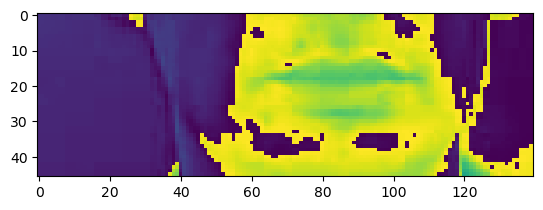

In [27]:
plt.imshow(frames[0])

In [28]:
def mappable_function(path:str) ->List[str]:
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

In [29]:
from matplotlib import pyplot as plt

In [30]:
data = tf.data.Dataset.list_files('./data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)
data = data.map(mappable_function)
data = data.padded_batch(2, padded_shapes=([75,None,None,None],[40]))
data = data.prefetch(tf.data.AUTOTUNE)
# Added for split 
train = data.take(450)
test = data.skip(450)

In [ ]:
len(test)

In [31]:
frames, alignments = data.as_numpy_iterator().next()

In [32]:
frames.shape

(2, 75, 46, 140, 1)

In [ ]:
len(frames)

In [33]:
sample = data.as_numpy_iterator()

In [ ]:
sample

In [34]:
val = sample.next();val[0] 

array([[[[[1.5451232 ],
          [1.5064951 ],
          [1.1974704 ],
          ...,
          [0.30902463],
          [0.23176847],
          [0.23176847]],

         [[1.2360985 ],
          [1.6223794 ],
          [1.2747266 ],
          ...,
          [0.30902463],
          [0.23176847],
          [0.23176847]],

         [[1.6223794 ],
          [1.6223794 ],
          [1.5064951 ],
          ...,
          [0.34765273],
          [0.27039656],
          [0.27039656]],

         ...,

         [[1.0429581 ],
          [1.0429581 ],
          [1.0429581 ],
          ...,
          [0.03862808],
          [0.03862808],
          [0.03862808]],

         [[1.0429581 ],
          [1.0429581 ],
          [1.0429581 ],
          ...,
          [0.03862808],
          [0.03862808],
          [0.03862808]],

         [[1.0429581 ],
          [1.0429581 ],
          [1.0429581 ],
          ...,
          [0.03862808],
          [0.03862808],
          [0.        ]]],


        [[[1.4292

In [ ]:
val

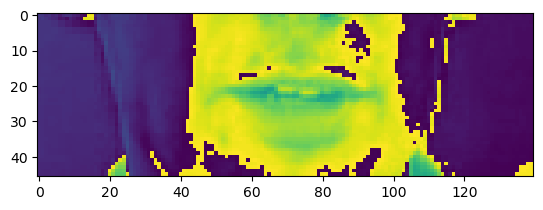

In [35]:
# 0:videos, 0: 1st video out of the batch,  0: return the first frame in the video 
plt.imshow(val[0][0][35])

In [36]:
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'set green at c five again'>

In [37]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [38]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [39]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75,46,140,1), padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same'))
model.add(Activation('relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer='Orthogonal', return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer='he_normal', activation='softmax'))

In [ ]:
model.summary()

In [40]:
yhat = model.predict(val[0])

1/1 [==============================] - 11s 11s/step


In [41]:
yhat

array([[[0.02228685, 0.02791287, 0.02855697, ..., 0.02635818,
         0.023073  , 0.02239529],
        [0.02271364, 0.02809326, 0.02946439, ..., 0.02504794,
         0.0225344 , 0.02207678],
        [0.02349819, 0.02772212, 0.0301844 , ..., 0.02377648,
         0.02213694, 0.02180405],
        ...,
        [0.03179297, 0.02073341, 0.0234363 , ..., 0.01996481,
         0.0245926 , 0.02560102],
        [0.03147327, 0.02043833, 0.0227928 , ..., 0.02013279,
         0.02473003, 0.02565688],
        [0.03055574, 0.02013751, 0.02185508, ..., 0.0205235 ,
         0.02525795, 0.02592219]],

       [[0.02108879, 0.02779074, 0.02607093, ..., 0.02360755,
         0.02184184, 0.02267896],
        [0.02084767, 0.02808069, 0.02669043, ..., 0.0221877 ,
         0.02117475, 0.02221192],
        [0.02085136, 0.02785156, 0.02742086, ..., 0.02111686,
         0.02069875, 0.0217794 ],
        ...,
        [0.02530074, 0.01983486, 0.0233339 , ..., 0.02091547,
         0.02438662, 0.02400372],
        [0.0

In [42]:
tf.strings.reduce_join([num_to_char(x) for x in tf.argmax(yhat[0],axis=1)])


<tf.Tensor: shape=(), dtype=string, numpy=b'tbbbrrrruuuuuuuuuurrrrrrrrrrrrrrrruuuuurrrffffffuuuuuuuuuuuuuuuuuuuuuuuuuuu'>

In [43]:
tf.strings.reduce_join([num_to_char(tf.argmax(x)) for x in yhat[0]])


<tf.Tensor: shape=(), dtype=string, numpy=b'tbbbrrrruuuuuuuuuurrrrrrrrrrrrrrrruuuuurrrffffffuuuuuuuuuuuuuuuuuuuuuuuuuuu'>

In [44]:
model.input_shape

(None, 75, 46, 140, 1)

In [45]:
model.output_shape

(None, 75, 41)

In [46]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [47]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [48]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [49]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss=CTCLoss)


In [50]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True) 


In [51]:
schedule_callback = LearningRateScheduler(scheduler)


In [52]:
example_callback = ProduceExample(test)


In [ ]:
model.fit(train, validation_data=test, epochs=100, callbacks=[checkpoint_callback, schedule_callback, example_callback])


Epoch 1/100
217/450 [=============>................] - ETA: 7:47:15 - loss: 94.6072